<a href="https://colab.research.google.com/github/rounit57/Deep_learning-/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from signal import signal, SIGPIPE, SIG_DFL
signal(SIGPIPE,SIG_DFL)

<Handlers.SIG_IGN: 1>

In [ ]:
!pip install wandb
!wandb login

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=12dc5f7dc6cd1aa5d224e32c9ee34e6ba5e0ffa3cf2506e67d99edc732e3d600
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or pr

In [ ]:
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import pprint
import wandb
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix


In [ ]:
wandb.init(project="cs6910_Ass_01_Q1", entity="rounit57")

wandb: Currently logged in as: rounit57. Use `wandb login --relogin` to force relogin


Load Data

In [ ]:
imagedata=tf.keras.datasets.fashion_mnist
(X,Y), (X_test,Y_test)=imagedata.load_data()
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.1,random_state = 43)

no_of_class=len(np.unique(Y))
pix_size = X.shape[1]*X.shape[2]

X_train = (X_train.reshape(X_train.shape[0],-1).T)/255.0
X_val = (X_val.reshape(X_val.shape[0],-1).T)/255.0
X_test = (X_test.reshape(X_test.shape[0],-1).T)/255.0

# Y_train = one_hot_encode(Y_train).T
# Y_val = onr_hot_encode(Y_val).T
# Y_test = one_hot_encode(Y_test).T



# print(X_train.shape)
# print(X_test.shape)
# print(X_val.shape)
# print(Y_train.shape)
# print(Y_test.shape)


4422102/4422102 [==============================] - 0s 0us/step


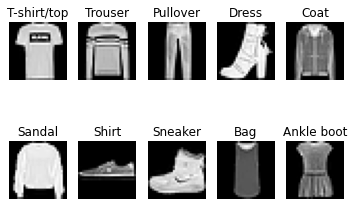

In [ ]:
label= {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

rows = 2
columns = 5
no_class = 10
y=list(Y_train)
for i in range(no_class):
     
    sample=y.index(i)
    image = X[sample]
    plt.subplot(rows, columns,i+1)
    # wandb.log({"images": [wandb.Image(image,caption=label[i])]})
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(label[i])
wandb.log({"image": plt})

In [ ]:
def one_hot_encode(x):
    y = np.zeros((x.size, x.max()+1))
    y[np.arange(x.size),x] = 1
    return y

In [ ]:

# Random initialization
def initialize_weights_random(N, weight_factor):
  np.random.seed(0)
  W = []
  b = []
  W.append(0)
  b.append(0)
  for i in range(1,l+1):
    W.append((np.random.randn(N[i],N[i-1]))*weight_factor)
    b.append(np.zeros((N[i],1)))
  return W,b 

# Xavier initialization 
def initialize_weights_xavier(N, weight_factor):
  
  W = []
  b = []
  W.append(0)
  b.append(0)
  for i in range(1,l+1):
    values = np.random.randn(N[i],N[i-1])*np.sqrt(2/(N[i]+N[i-1]))
    W.append(np.array(values)*weight_factor)
    b.append(np.zeros((N[i],1)))
  return W,b 

# Choosing initialization function
def initialize_weights(N,init, act):
  if act =='relu':
    weight_factor = 10**-2
  else:
    weight_factor = 1
  if init=='random':
    return initialize_weights_random(N, weight_factor)
  if init=='xavier':
    return initialize_weights_xavier(N, weight_factor)

In [ ]:
def sigmoid(z):
  return 1/(1+(np.exp(-z)))


def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))


def relu(z):
  return np.maximum(0,z)

        
def tanh_fun(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z)) 


def sigmoid_diff(z):
  sig = 1 / (1 + np.exp(-z))
  return sig*(1-sig)

# def softmax_diff(z):    
#   return z*(1-z)

def relu_diff(z):
  relu = np.maximum(0, z)
  relu[relu > 0] = 1
  return relu

def tanh_fun_diff(z):
  tanh=(np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
  return 1-tanh**2


# Choosing activation function
def activation(a,act):
  if act=='sigmoid':
    return sigmoid(a)
  if act=='tanh':
    return tanh_fun(a)
  if act=='relu':
    return relu(a)

# Choosing derivative of activation function
def dActivation(a,act):
  if act=='sigmoid':
    return sigmoid_diff(a)
  if act=='tanh':
    return tanh_fun_diff(a)
  if act=='relu':
    return relu_diff(a)

In [ ]:

# Cross entropy loss
def cross_entropy_loss(y_hat,Y, W, alpha):
  loss = 0
  for i in range(Y.shape[1]):
    loss -= np.log(y_hat[Y[0,i],i])
  norm = 0
  for i in range(1, len(W)):
    norm +=np.linalg.norm((W[i]))
  loss = loss +norm
  loss = loss/Y.shape[1]
  return loss

# Cross entropy loss derivative
def d_cross_entropy_loss(y_hat, X, y):
  return (y_hat - one_hot_encode(X,y))

# Mean squared loss
def l2_loss(y_hat,Y,W,alpha):
  loss=(np.linalg.norm(y_hat-Y))/2
  norm = 0
  for i in range(1, len(W)):
    norm +=np.linalg.norm((W[i]))
  loss = loss +norm
  loss = loss/Y.shape[1]
  return loss

# Mean squared loss derivative
def d_l2_loss(y_hat,X, Y):
  return np.multiply((y_hat - one_hot_encode(X,Y)),np.multiply(y_hat,(1-y_hat)))

# Choosing loss function
def Loss(y_hat, y, W, alpha, choose_loss='crossentropy'):
  if choose_loss == 'crossentropy':
    return cross_entropy_loss(y_hat,y,W, alpha)
  if choose_loss =='l2':
    return l2_loss(y_hat,y,W, alpha)

# Choosing derivative of loss function
def dLoss(y_hat,X, y, choose_loss='crossentropy'):
  if choose_loss == 'crossentropy':
    return d_cross_entropy_loss(y_hat, X, y)
  if choose_loss =='l2':
    return d_l2_loss(y_hat, X, y)

In [ ]:
def accuracy(y_hat,Y):
  return ((y_hat == Y).sum()/Y.shape[1])
 
def loss_and_accuracy(W, b, X, Y, act, alpha):
  y_hat = feedforward(X, W, b, N, l, act)[2]
  y_predict = np.argmax(y_hat,axis=0).reshape([1,X.shape[1]])
  loss = Loss(y_hat, Y, W, alpha)                             # For L2 loss, add 'l2' as an argument in the end
  acc = accuracy(y_predict,Y)
  return loss,acc

In [ ]:
def feedforward(X_input, W, b, N, l, act):
  a=[]
  a.append(np.array([0]))
  h=[]
  h.append(X_input)
  for i in range(1,l):
    a_new=b[i]+np.matmul(W[i],h[i-1])
    h_new=activation(a_new,act)
    a.append(a_new)
    h.append(h_new)

  a_new=b[l]+np.matmul(W[l],h[l-1])
  y_hat=softmax(a_new)
  a.append(a_new)

  return a,h,y_hat

In [ ]:
def backprop(X, y,y_hat,W,a,h,act,alpha):
  grad_W=[]
  grad_b=[]
  grad_a=[]
  grad_h=[]
  
  da = dLoss(y_hat, X, y) # For L2 loss, add 'l2' as an argument in the end
  grad_a.append(da)

  for i in reversed(range(1,l+1)):
    dw = (np.matmul(da,np.transpose(h[i-1])) + alpha*W[i])/(X.shape[1])
    db = np.sum(da, axis=1, keepdims=True)/(X.shape[1])
    dh_prev = np.matmul(np.transpose(W[i]),da)
    da_prev = dh_prev*dActivation(a[i-1],act)

    grad_W.append(dw)
    grad_b.append(db)
    da=da_prev

  grad_W.append(0)
  grad_b.append(0)
  grad_W.reverse()
  grad_b.reverse() 

  return grad_W,grad_b

In [ ]:
# SGD
def gradient_descent(epochs, learn_rate, batch_size, act, init, N, alpha):
  W, b = initialize_weights(N,init, act)
  n=(np.ceil(X_train.shape[1]/batch_size)).astype(int)
  for i in range(epochs):
    for j in range(n):
      X=X_train[:,(j*batch_size):((j+1)*batch_size)]
      Y=Y_train[:,(j*batch_size):((j+1)*batch_size)]
      a, h, y_hat = feedforward(X, W, b, N, l,act)
      grad_W, grad_b = backprop(X, Y, y_hat, W, a, h, act, alpha)
      W_new =[]
      W_new.append(0)
      b_new =[]
      b_new.append(0)
      for k in range(1,l+1):
        W_new.append(W[k] - (learn_rate*grad_W[k] - learn_rate*alpha*W[k]))
        b_new.append(b[k] - (learn_rate*grad_b[k]))
      W = W_new
      b = b_new
    loss, acc = loss_and_accuracy(W, b, X_train, Y_train, act,alpha)
    val_loss, val_acc = loss_and_accuracy(W, b, X_val, Y_val, act,alpha)
    wandb.log({"loss": loss, "val_loss": val_loss, "accuracy": acc, "val_accuracy": val_acc, "epoch": i})
  return W, b


# Momentum based gradient descent
def mom_grad_descent(epochs, learn_rate, gamma, batch_size, act, init, N, alpha):
  W, b = initialize_weights(N,init, act)
  update_prev_w = []
  update_prev_w.append(0)
  update_prev_b = []
  update_prev_b.append(0)
  n=(np.ceil(X_train.shape[1]/batch_size)).astype(int)
  for i in range(1,l+1):
    update_prev_w.append(np.zeros(W[i].shape))
    update_prev_b.append(np.zeros(b[i].shape))
  for i in range(epochs):
    for j in range(n):
      X=X_train[:,(j*batch_size):((j+1)*batch_size)]
      Y=Y_train[:,(j*batch_size):((j+1)*batch_size)]
      update_w = []
      update_w.append(0)
      update_b = []
      update_b.append(0)
      a, h, y_hat = feedforward(X, W, b, N, l, act)
      grad_W, grad_b = backprop(X, Y, y_hat, W, a, h, act, alpha)
      W_new =[]
      W_new.append(0)
      b_new =[]
      b_new.append(0)
      
      for k in range(1,l+1):
        update_w.append(np.zeros(W[k].shape))
        update_b.append(np.zeros(b[k].shape))
        update_w[k] = gamma*update_prev_w[k] + learn_rate*grad_W[k] + learn_rate*alpha*W[k]
        update_b[k] = gamma*update_prev_b[k] + learn_rate*grad_b[k]
        W_new.append((W[k] - update_w[k]/batch_size))
        b_new.append((b[k] - update_b[k]/batch_size))
        update_prev_w[k]=update_w[k]
        update_prev_b[k]=update_b[k]
      del update_w
      del update_b
      W = W_new
      b = b_new
    loss, acc = loss_and_accuracy(W, b, X_train, Y_train, act,alpha)
    val_loss, val_acc = loss_and_accuracy(W, b, X_val, Y_val, act,alpha)
    wandb.log({"loss": loss, "val_loss": val_loss, "accuracy": acc, "val_accuracy": val_acc, "epoch": i})
  return W, b


# Nesterov accelerated gradient descent
def nesterov_grad_descent(epochs, learn_rate, gamma, batch_size, act, init, N, alpha):
  W, b = initialize_weights(N,init, act)
  update_prev_w = []
  update_prev_w.append(0)
  update_prev_b = []
  update_prev_b.append(0)
  n=(np.ceil(X_train.shape[1]/batch_size)).astype(int)
  for i in range(1,l+1):
    update_prev_w.append(np.zeros(W[i].shape))
    update_prev_b.append(np.zeros(b[i].shape))
  for i in range(epochs):
    for j in range(n):
      X=X_train[:,(j*batch_size):((j+1)*batch_size)]
      Y=Y_train[:,(j*batch_size):((j+1)*batch_size)]
      update_w = []
      update_w.append(0)
      update_b = []
      update_b.append(0)
      a, h, y_hat = feedforward(X, W, b, N, l, act)
      W_new =[]
      W_new.append(0)
      b_new =[]
      b_new.append(0)
      for k in range(1,l+1):
        update_w.append(np.zeros(W[k].shape))
        update_b.append(np.zeros(b[k].shape))
        update_w[k] = gamma*update_prev_w[k]
        update_b[k] = gamma*update_prev_b[k]
        W_new.append((W[k] - update_w[k]/batch_size))
        b_new.append((b[k] - update_b[k]/batch_size))
      W = W_new
      b = b_new
      grad_W, grad_b = backprop(X, Y, y_hat, W, a, h, act, alpha)
      for k in range(1,l+1):
        update_w[k] = gamma*update_prev_w[k] + learn_rate*grad_W[k] + learn_rate*alpha*W[k]
        update_b[k] = gamma*update_prev_b[k] + learn_rate*grad_b[k]
        W_new[k] = (W[k] - update_w[k]/batch_size)
        b_new[k] = (b[k] - update_b[k]/batch_size)
        update_prev_w[k]=update_w[k]
        update_prev_b[k]=update_b[k]
      del update_w
      del update_b
      W = W_new
      b = b_new
    loss, acc = loss_and_accuracy(W, b, X_train, Y_train, act,alpha)
    val_loss, val_acc = loss_and_accuracy(W, b, X_val, Y_val, act,alpha)
    wandb.log({"loss": loss, "val_loss": val_loss, "accuracy": acc, "val_accuracy": val_acc, "epoch": i}) #Comment out this line before plotting the confusion matrix
  return W, b


# RMS prop
def rms_prop(epochs, learn_rate, beta, epsilon, batch_size, act, init, N, alpha):
  W, b = initialize_weights(N,init, act)
  update_prev_w = []
  update_prev_w.append(0)
  update_prev_b = []
  update_prev_b.append(0)
  n=(np.ceil(X_train.shape[1]/batch_size)).astype(int)
  for i in range(1,l+1):
    update_prev_w.append(np.zeros(W[i].shape))
    update_prev_b.append(np.zeros(b[i].shape))
  for i in range(epochs):
    for j in range(n):
      X=X_train[:,(j*batch_size):((j+1)*batch_size)]
      Y=Y_train[:,(j*batch_size):((j+1)*batch_size)]
      update_w = []
      update_w.append(0)
      update_b = []
      update_b.append(0)
      a, h, y_hat = feedforward(X, W, b, N, l, act)
      grad_W, grad_b = backprop(X, Y, y_hat, W, a, h, act, alpha)
      W_new =[]
      W_new.append(0)
      b_new =[]
      b_new.append(0)
      for k in range(1,l+1):
        update_w.append(np.zeros(W[k].shape))
        update_b.append(np.zeros(b[k].shape))
        update_w[k] = beta*update_prev_w[k] + (1-beta)*np.square(grad_W[k])
        update_b[k] = beta*update_prev_b[k] + (1-beta)*np.square(grad_b[k])
        W_new.append((W[k] - (learn_rate*np.divide(grad_W[k],(np.sqrt(update_w[k]+epsilon)))) - learn_rate*alpha*W[k]))
        b_new.append((b[k] - (learn_rate*np.divide(grad_b[k],(np.sqrt(update_b[k]+epsilon))))))
        update_prev_w[k]=update_w[k]
        update_prev_b[k]=update_b[k]
      del update_w
      del update_b
      W = W_new
      b = b_new
    loss, acc = loss_and_accuracy(W, b, X_train, Y_train, act,alpha)
    val_loss, val_acc = loss_and_accuracy(W, b, X_val, Y_val, act,alpha)
    wandb.log({"loss": loss, "val_loss": val_loss, "accuracy": acc, "val_accuracy": val_acc, "epoch": i})
  return W, b


# Adam
def adam(epochs, learn_rate, beta1, beta2, epsilon, batch_size, act, init, N, alpha):
  W, b = initialize_weights(N,init, act)
  m_prev_w = []
  m_prev_w.append(0)
  m_prev_b = []
  m_prev_b.append(0)
  v_prev_w = []
  v_prev_w.append(0)
  v_prev_b = []
  v_prev_b.append(0)
  n=(np.ceil(X_train.shape[1]/batch_size)).astype(int)
  for i in range(1,l+1):
    m_prev_w.append(np.zeros(W[i].shape))
    m_prev_b.append(np.zeros(b[i].shape))
    v_prev_w.append(np.zeros(W[i].shape))
    v_prev_b.append(np.zeros(b[i].shape))
  for i in range(epochs):
    for j in range(n):
      X=X_train[:,(j*batch_size):((j+1)*batch_size)]
      Y=Y_train[:,(j*batch_size):((j+1)*batch_size)]
      m_w = []
      m_w.append(0)
      v_w = []
      v_w.append(0)
      m_b = []
      m_b.append(0)
      v_b = []
      v_b.append(0)
      a, h, y_hat = feedforward(X, W, b, N, l, act)
      grad_W, grad_b = backprop(X, Y, y_hat, W, a, h, act, alpha)
      W_new =[]
      W_new.append(0)
      b_new =[]
      b_new.append(0)
      for k in range(1,l+1):
        m_w.append(np.zeros(W[k].shape))
        v_w.append(np.zeros(W[k].shape))
        m_b.append(np.zeros(b[k].shape))
        v_b.append(np.zeros(b[k].shape))
        t = i*n + j+1
        m_w[k] = (beta1*m_prev_w[k] + (1-beta1)*grad_W[k])/(1-np.power(beta1,t))
        v_w[k] = (beta2*v_prev_w[k] + (1-beta2)*np.square(grad_W[k]))/(1-np.power(beta2,t))
        m_b[k] = (beta1*m_prev_b[k] + (1-beta1)*grad_b[k])/(1-np.power(beta1,t))
        v_b[k] = (beta2*v_prev_b[k] + (1-beta2)*np.square(grad_b[k]))/(1-np.power(beta2,t))
        W_new.append((W[k] - (learn_rate*np.divide(m_w[k],(np.sqrt(v_w[k]+epsilon)))) - learn_rate*alpha*W[k]))
        b_new.append((b[k] - (learn_rate*np.divide(m_b[k],(np.sqrt(v_b[k]+epsilon))))))
        m_prev_w[k] = m_w[k]
        v_prev_w[k] = v_w[k]
        m_prev_b[k] = m_b[k]
        v_prev_b[k] = v_b[k]
      del m_w
      del v_w
      del m_b
      del v_b
      W = W_new
      b = b_new
    loss, acc = loss_and_accuracy(W, b, X_train, Y_train, act,alpha)
    val_loss, val_acc = loss_and_accuracy(W, b, X_val, Y_val, act,alpha)
    wandb.log({"loss": loss, "val_loss": val_loss, "accuracy": acc, "val_accuracy": val_acc, "epoch": i})
  return W, b


# Nadam
def nadam(epochs, learn_rate, beta1, beta2, epsilon, batch_size, act, init, N, alpha):
  W, b = initialize_weights(N,init, act)
  m_prev_w = []
  m_prev_w.append(0)
  m_prev_b = []
  m_prev_b.append(0)
  v_prev_w = []
  v_prev_w.append(0)
  v_prev_b = []
  v_prev_b.append(0)
  n=(np.ceil(X_train.shape[1]/batch_size)).astype(int)
  for i in range(1,l+1):
    m_prev_w.append(np.zeros(W[i].shape))
    m_prev_b.append(np.zeros(b[i].shape))
    v_prev_w.append(np.zeros(W[i].shape))
    v_prev_b.append(np.zeros(b[i].shape))
  for i in range(epochs):
    for j in range(n):
      X=X_train[:,(j*batch_size):((j+1)*batch_size)]
      Y=Y_train[:,(j*batch_size):((j+1)*batch_size)]
      m_w = []
      m_w.append(0)
      v_w = []
      v_w.append(0)
      m_b = []
      m_b.append(0)
      v_b = []
      v_b.append(0)
      a, h, y_hat = feedforward(X, W, b, N, l, act)
      W_new =[]
      W_new.append(0)
      b_new =[]
      b_new.append(0)
      for k in range(1,l+1):
        m_w.append(np.zeros(W[k].shape))
        v_w.append(np.zeros(W[k].shape))
        m_b.append(np.zeros(b[k].shape))
        v_b.append(np.zeros(b[k].shape))
        t = i*n + j+1
        m_w[k] = (beta1*m_prev_w[k])/(1-np.power(beta1,t))
        v_w[k] = (beta2*v_prev_w[k])/(1-np.power(beta2,t))
        m_b[k] = (beta1*m_prev_b[k])/(1-np.power(beta1,t))
        v_b[k] = (beta2*v_prev_b[k])/(1-np.power(beta2,t))
        W_new.append((W[k] - (learn_rate*np.divide(m_w[k],(np.sqrt(v_w[k]+epsilon))))))
        b_new.append((b[k] - (learn_rate*np.divide(m_b[k],(np.sqrt(v_b[k]+epsilon))))))
      W = W_new
      b = b_new
      grad_W, grad_b = backprop(X, Y, y_hat, W, a, h, act, alpha)
      for k in range(1,l+1):
        m_w[k] = (beta1*m_prev_w[k] + (1-beta1)*grad_W[k])/(1-np.power(beta1,t))
        v_w[k] = (beta2*v_prev_w[k] + (1-beta2)*np.square(grad_W[k]))/(1-np.power(beta2,t))
        m_b[k] = (beta1*m_prev_b[k] + (1-beta1)*grad_b[k])/(1-np.power(beta1,t))
        v_b[k] = (beta2*v_prev_b[k] + (1-beta2)*np.square(grad_b[k]))/(1-np.power(beta2,t))
        W_new[k] = W[k] - (learn_rate*np.divide(m_w[k],(np.sqrt(v_w[k]+epsilon)))) - learn_rate*alpha*W[k]
        b_new[k] = b[k] - (learn_rate*np.divide(m_b[k],(np.sqrt(v_b[k]+epsilon))))
        m_prev_w[k] = m_w[k]
        v_prev_w[k] = v_w[k]
        m_prev_b[k] = m_b[k]
        v_prev_b[k] = v_b[k]
      del m_w
      del v_w
      del m_b
      del v_b
      W = W_new
      b = b_new
    loss, acc = loss_and_accuracy(W, b, X_train, Y_train, act,alpha)
    val_loss, val_acc = loss_and_accuracy(W, b, X_val, Y_val, act,alpha)
    wandb.log({"loss": loss, "val_loss": val_loss, "accuracy": acc, "val_accuracy": val_acc, "epoch": i})
  return W, b

In [ ]:
N_example = [X_train.shape[0],64,32,16,no_of_class]                                      # Structure of the neural network
l = len(N_example) - 1                                                                    # Number of layers
W, b = initialize_weights (N_example,'random','sigmoid')
num = np.random.randint(0, X_train.shape[1]-1)                                            # Random image number for which the feedforward output will be printed
_,_,y_hat = feedforward(X_train[:, num].reshape([784,1]), W, b, N_example, l, 'sigmoid')  # Probability of classes as output
print (y_hat)

[[5.83644321e-04]
 [5.09185798e-03]
 [7.06951479e-04]
 [2.11296412e-02]
 [1.94602924e-04]
 [4.64082101e-03]
 [3.94606828e-01]
 [4.96929861e-01]
 [1.64034681e-03]
 [7.44754448e-02]]


In [ ]:

sweep_config = {
    'method': 'grid'
    }


### To run each sweep mentioned in the report, uncomment only the corresponding dictionary ###

# Parameters for first sweep
parameters_dict = {
    'networks':{
        'values': [0]
      },
    'alpha': {
        'values': [0.0005]
      },
    'learn_rate': {
        'values': [1e-2]
      },
    'epochs': {
        'values': [10]
      },
    'batch_size': {
        'values': [32]
      },
    'init': {
        'values': ['random','xavier']
      },
    'optimizer': {
        'values': ['sgd','mom','nest','rms','adam','nadam']
      },
    'act': {
          'values': ['tanh']
      }
}

# Parameters for second sweep
parameters_dict = {
    'networks':{
        'values': [1,2]
      },
    'alpha': {
        'values': [0.0005]
      },
    'learn_rate': {
        'values': [1e-1]
      },
    'epochs': {
        'values': [10]
      },
    'batch_size': {
        'values': [32]
      },
    'init': {
        'values': ['xavier']
      },
    'optimizer': {
        'values': ['mom', 'nest']
      },
    'act': {
          'values': ['tanh']
      }
}

# Parameters for third sweep
parameters_dict = {
    'networks':{
        'values': [0,1,2,3,4,5,6,7,8]
      },
    'alpha': {
        'values': [0.0005]
      },
    'learn_rate': {
        'values': [1e-1]
      },
    'epochs': {
        'values': [10]
      },
    'batch_size': {
        'values': [32]
      },
    'init': {
        'values': ['xavier']
      },
    'optimizer': {
        'values': ['mom', 'nest']
      },
    'act': {
          'values': ['tanh']
      }
}

# Parameters for fourth sweep
parameters_dict = {
    'networks':{
        'values': [1,2,3,6]
      },
    'alpha': {
        'values': [0.0005, 0.05]
      },
    'learn_rate': {
        'values': [1e-1]
      },
    'epochs': {
        'values': [7,10]
      },
    'batch_size': {
        'values': [16,32]
      },
    'init': {
        'values': ['xavier']
      },
    'optimizer': {
        'values': ['mom', 'nest']
      },
    'act': {
          'values': ['tanh']
      }
}

# Parameters for fifth sweep
parameters_dict = {
    'networks':{
        'values': [3,6]
      },
    'alpha': {
        'values': [0.0005,0.005]
      },
    'learn_rate': {
        'values': [1e-2,1e-3]
      },
    'epochs': {
        'values': [15]
      },
    'batch_size': {
        'values': [64,32]
      },
    'init': {
        'values': ['xavier']
      },
    'optimizer': {
        'values': ['mom', 'nest']
      },
    'act': {
          'values': ['tanh']
      }
}

# Parameters for sixth sweep (with augmented dataset)
# To augment the dataset, uncomment the corresponding line in the load_data() function
parameters_dict = {
    'networks':{
        'values': [3]
      },
    'alpha': {
        'values': [0.0005]
      },
    'learn_rate': {
        'values': [1e-2,1e-3]
      },
    'epochs': {
        'values': [15]
      },
    'batch_size': {
        'values': [32]
      },
    'init': {
        'values': ['xavier']
      },
    'optimizer': {
        'values': ['mom', 'nest']
      },
    'act': {
          'values': ['tanh','relu']
      }
}

sweep_config['parameters'] = parameters_dict
pprint.pprint(sweep_config)

def training_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config
        network = [[X_train.shape[0],64,32,16,no_of_class],
                   [X_train.shape[0],32,32,32,no_of_class],
                   [X_train.shape[0],64,64,64,no_of_class],
                   [X_train.shape[0],128,64,32,16,no_of_class],
                   [X_train.shape[0],32,32,32,32,no_of_class],
                   [X_train.shape[0],64,64,64,64,no_of_class],
                   [X_train.shape[0],256,128,64,32,16,no_of_class],
                   [X_train.shape[0],32,32,32,32,32,no_of_class],
                   [X_train.shape[0],64,64,64,64,64,no_of_class]]
        global N
        N = network[config.networks]
        global l
        l = len(N)-1
        wandb.log({"Structure": N})
        if config.optimizer == 'sgd':
          gradient_descent(config.epochs, config.learn_rate, config.batch_size, config.act, config.init, N, config.alpha)
        if config.optimizer == 'mom':
          mom_grad_descent(config.epochs, config.learn_rate, 0.9, config.batch_size, config.act, config.init, N, config.alpha)
        if config.optimizer == 'nest':
          nesterov_grad_descent(config.epochs, config.learn_rate, 0.9, config.batch_size, config.act, config.init, N, config.alpha)
        if config.optimizer == 'rms':
          rms_prop(config.epochs, config.learn_rate, 0.9, 10**-8,config.batch_size, config.act, config.init, N, config.alpha)
        if config.optimizer == 'adam':
          adam(config.epochs, config.learn_rate, 0.9, 0.99, 10**-8,config.batch_size, config.act, config.init, N, config.alpha)
        if config.optimizer == 'nadam':
          nadam(config.epochs, config.learn_rate, 0.9, 0.99, 10**-8,config.batch_size, config.act, config.init, N, config.alpha)

{'method': 'grid',
 'parameters': {'act': {'values': ['tanh', 'relu']},
                'alpha': {'values': [0.0005]},
                'batch_size': {'values': [32]},
                'epochs': {'values': [15]},
                'init': {'values': ['xavier']},
                'learn_rate': {'values': [0.01, 0.001]},
                'networks': {'values': [3]},
                'optimizer': {'values': ['mom', 'nest']}}}


In [ ]:
sweep_id = wandb.sweep(sweep_config, project="cs6910_Ass_01_Q4")
wandb.agent(sweep_id, training_sweep)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: avmyz16q
Sweep URL: https://wandb.ai/rounit/cs6910_Ass_01_Q4/sweeps/avmyz16q


In [ ]:
N = [784, 128, 64, 32, 16, 10]
l = len(N)-1
W, b = nesterov_grad_descent(30, 0.01, 0.9, 32, 'tanh', 'xavier', N, 0.0005)
y_hat = feedforward(X_test, W, b, N, l, 'tanh')[2]
y_predict = np.argmax(y_hat,axis=0).reshape([1,X_test.shape[1]])
wandb.init(project="cs6910_Ass_01_Q4", entity="rounit57")
wandb.log({"conf_mat" : wandb.plot.confusion_matrix(probs=None, y_true=Y_test.reshape([Y_test.shape[1]]), preds=y_predict.reshape([Y_test.shape[1]]),class_names=label)})
     